In [2]:
import pandas as pd
import numpy as np

In [3]:
df_calendars = pd.read_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\calendar_detail.csv') 


C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\373134440.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_calendars = pd.read_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\calendar_detail.csv')


In [4]:
df_listings = pd.read_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\listings_detail.csv')   

In [5]:
df_reviews = pd.read_csv(r'E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\reviews_detail.csv')


In [6]:
#para verificar las columnas que estan contenidas en el dataframe   
print(df_calendars.columns)
print(df_listings.columns)
print(df_reviews.columns)


Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_min

In [7]:
#para saber la cantidad de filas y columnas que tiene el dataframe
print("df_calendar contiene:" + str(df_calendars.shape))
print("df_listing contiene:" + str(df_listings.shape))
print("df_reviews contiene:" + str(df_reviews.shape))


df_calendar contiene:(35105981, 7)
df_listing contiene:(96182, 75)
df_reviews contiene:(1887519, 6)


In [8]:
df_listings.head()
df_listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96182 non-null  int64  
 1   listing_url                                   96182 non-null  object 
 2   scrape_id                                     96182 non-null  int64  
 3   last_scraped                                  96182 non-null  object 
 4   source                                        96182 non-null  object 
 5   name                                          96182 non-null  object 
 6   description                                   92763 non-null  object 
 7   neighborhood_overview                         45661 non-null  object 
 8   picture_url                                   96171 non-null  object 
 9   host_id                                       96182 non-null 

In [9]:
#para seleccionar las columnas que se van a utilizar del dataframe listings
df_listings2 = df_listings[['id','host_id','host_is_superhost','host_identity_verified','neighbourhood_cleansed',
       'latitude','longitude', 'property_type', 'room_type', 'accommodates','price','minimum_nights', 'maximum_nights', 
       'license', 'instant_bookable']]

df_listings2.head() #para visualizar las primeras 5 filas del dataframe df_listings2


,id,host_id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,license,instant_bookable
0,13913,54730,t,t,Islington,51.56861,-0.11270,Private room in rental unit,Private room,1,$59.00,1,29,NaN,f
1,15400,60302,f,t,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,$120.00,4,30,NaN,f
2,17402,67564,t,t,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,$493.00,3,365,NaN,f
3,24328,41759,f,t,Wandsworth,51.47072,-0.16266,Entire townhouse,Entire home/apt,4,$190.00,2,1125,NaN,f
4,33332,144444,f,f,Richmond upon Thames,51.46410,-0.32498,Private room in home,Private room,2,$140.00,2,21,NaN,f


In [10]:
df_listings2.dtypes #para saber el tipo de dato de cada columna del dataframe df_listings2


id                          int64
host_id                     int64
host_is_superhost          object
host_identity_verified     object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
price                      object
minimum_nights              int64
maximum_nights              int64
license                   float64
instant_bookable           object
dtype: object

In [11]:
#para comenzar con la limpieza de los datos, se va a verificar si hay valores nulos en el dataframe df_listings2    
df_listings2.isnull().mean() * 100  #para saber el porcentaje de valores nulos en cada columna del dataframe df_listings2


id                          0.000000
host_id                     0.000000
host_is_superhost           1.547067
host_identity_verified      0.005198
neighbourhood_cleansed      0.000000
latitude                    0.000000
longitude                   0.000000
property_type               0.000000
room_type                   0.000000
accommodates                0.000000
price                      34.286041
minimum_nights              0.000000
maximum_nights              0.000000
license                   100.000000
instant_bookable            0.000000
dtype: float64

In [12]:
#para convertir la columna price a tipo numerico
df_listings2['price'] = df_listings2['price'].str.replace('$','')
df_listings2['price'] = df_listings2['price'].str.replace(',','')   
df_listings2['price'] = df_listings2['price'].astype(float) #para convertir la columna price a tipo numerico
df_listings2['price'].head() #para visualizar las primeras 5 filas de la columna price  


C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\1188053511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2['price'] = df_listings2['price'].str.replace('$','')
C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\1188053511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2['price'] = df_listings2['price'].str.replace(',','')
C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\1188053511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

0     59.0
1    120.0
2    493.0
3    190.0
4    140.0
Name: price, dtype: float64

In [13]:
#para convertir la columna licencse a tipo boleano
df_listings2['license'] = df_listings2['license'].notnull() #para convertir la columna license a tipo boleano
df_listings2['license'].head() #para visualizar las primeras 5 filas de la columna license  


C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\3130829802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2['license'] = df_listings2['license'].notnull() #para convertir la columna license a tipo boleano


0    False
1    False
2    False
3    False
4    False
Name: license, dtype: bool

In [14]:
df_listings2.isnull().mean() * 100  #para saber el porcentaje de valores nulos en cada columna del dataframe df_listings2

id                         0.000000
host_id                    0.000000
host_is_superhost          1.547067
host_identity_verified     0.005198
neighbourhood_cleansed     0.000000
latitude                   0.000000
longitude                  0.000000
property_type              0.000000
room_type                  0.000000
accommodates               0.000000
price                     34.286041
minimum_nights             0.000000
maximum_nights             0.000000
license                    0.000000
instant_bookable           0.000000
dtype: float64

In [15]:
#para corregir los valores nulos de la columna host_is_superhost, host_identity_verified
df_listings2['host_is_superhost'] = df_listings2['host_is_superhost'].fillna('f') #para reemplazar los valores nulos por 'f'
df_listings2['host_identity_verified'] = df_listings2['host_identity_verified'].fillna('f') #para reemplazar los valores nulos por 'f'
 



C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\2117396487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2['host_is_superhost'] = df_listings2['host_is_superhost'].fillna('f') #para reemplazar los valores nulos por 'f'
C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\2117396487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2['host_identity_verified'] = df_listings2['host_identity_verified'].fillna('f') #para reemplazar los valores nulos por 'f'


<Axes: >

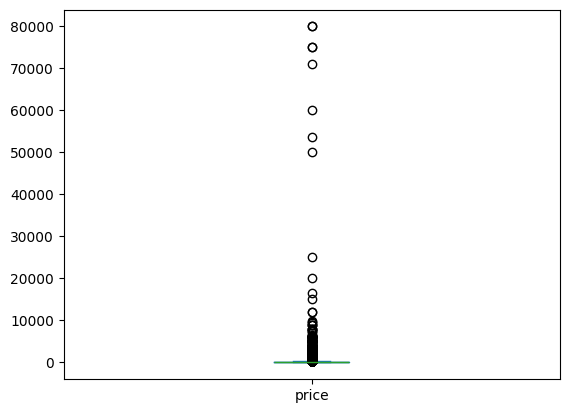

In [16]:
#para verificar la los aoutliers de la columna price    
df_listings2['price'].describe() #para obtener un resumen de la columna price   
df_listings2['price'].plot(kind='box') #para visualizar los outliers de la columna price
    

In [17]:
#vamos a segmentar la columna price segun las tarifas por noche en valor monetario, identificando las tarifas por noche en 0-300, 300-500, 500-1000 y mayores de 1000
df_listings2['price_segment'] = pd.cut(df_listings2['price'], bins=[0, 300, 500, 1000, 10000], labels=['0-300', '300-500', '500-1000', '1000+'])
df_listings2['price_segment'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment     
df_listings2['price_segment'].head() #para visualizar las primeras 5 filas de la columna price_segment  



C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\372889675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2['price_segment'] = pd.cut(df_listings2['price'], bins=[0, 300, 500, 1000, 10000], labels=['0-300', '300-500', '500-1000', '1000+'])


0      0-300
1      0-300
2    300-500
3      0-300
4      0-300
Name: price_segment, dtype: category
Categories (4, object): ['0-300' < '300-500' < '500-1000' < '1000+']

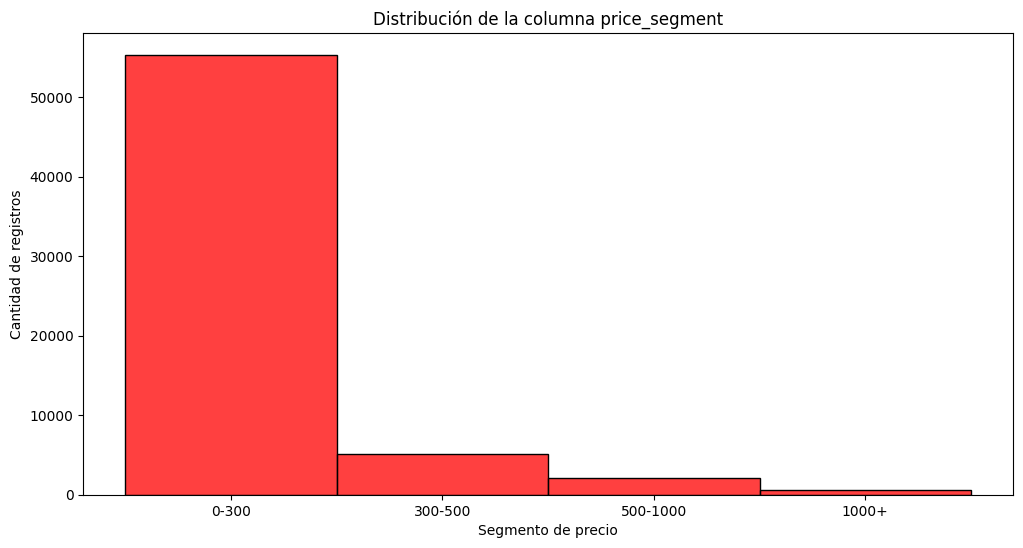

In [18]:
#mostrar mediante un hisplot la distribucion de la columna price_segment
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(df_listings2['price_segment'], kde=False, color='red')
plt.title('Distribución de la columna price_segment')
plt.xlabel('Segmento de precio')
plt.ylabel('Cantidad de registros')
plt.show()



In [19]:
#para separar de la columna price_segment los valores que estan en el segmento 1000+ y almacenarlos en un nuevo dataframe   
df_listings1000 = df_listings2[df_listings2['price_segment'] == '1000+']    

#para separar de la columna price_segment los valores que estan en el segmento 500-1000 y almacenarlos en un nuevo dataframe    
df_listings500 = df_listings2[df_listings2['price_segment'] == '500-1000']  

#para separar de la columna price_segment los valores que estan en los segmentos 0-300 y 300-500 y almacenarlos en un nuevo dataframe juntos
df_listings0_500 = df_listings2[df_listings2['price_segment'].isin(['0-300', '300-500'])]
df_listings0_500['price_segment'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment del dataframe df_listings0_500


price_segment
0-300       55339
300-500      5151
500-1000        0
1000+           0
Name: count, dtype: int64

In [20]:
df_listings0_500.head() #para visualizar las primeras 5 filas del dataframe df_listings0_500    



,id,host_id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,license,instant_bookable,price_segment
0,13913,54730,t,t,Islington,51.56861,-0.11270,Private room in rental unit,Private room,1,59.0,1,29,False,f,0-300
1,15400,60302,f,t,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,120.0,4,30,False,f,0-300
2,17402,67564,t,t,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,493.0,3,365,False,f,300-500
3,24328,41759,f,t,Wandsworth,51.47072,-0.16266,Entire townhouse,Entire home/apt,4,190.0,2,1125,False,f,0-300
4,33332,144444,f,f,Richmond upon Thames,51.46410,-0.32498,Private room in home,Private room,2,140.0,2,21,False,f,0-300


In [21]:
#exportamos los dataframes df_listings1000, df_listings500 y df_listings0_500 a archivos csv    
df_listings1000.to_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\listings1000.csv', index=False)
df_listings500.to_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\listings500.csv', index=False)
df_listings0_500.to_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\listings0_500.csv', index=False)



In [22]:
df_reviews.isnull().mean() * 100  #para saber el porcentaje de valores nulos en cada columna del dataframe df_reviews


listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000053
comments         0.009960
dtype: float64

In [23]:
#cargar el archivo neighborhoods.csv de la carpeta Sumary
df_neighborhoods = pd.read_csv("E:\Bootcamp\Proyecto Modulo 2 Airbnb\Sumary/neighbourhoods.csv")


In [24]:
#verificamos la cantidad de filas y columnas que tiene el dataframe df_neighborhoods
print("df_neighborhoods contiene:" + str(df_neighborhoods.shape))
    

df_neighborhoods contiene:(33, 2)


In [25]:
df_neighborhoods.isnull().mean() * 100  #para saber el porcentaje de valores nulos en cada columna del dataframe df_neighborhoods

neighbourhood_group    100.0
neighbourhood            0.0
dtype: float64

In [26]:
#eliminamos la columna neighbourhood_group de df_neighborhoods
df_neighborhoods = df_neighborhoods.drop('neighbourhood_group', axis=1) 


In [27]:
#verificamos que se haya eliminado la columna neighbourhood_group e imprime las primeras 5 filas del dataframe df_neighborhoods
print(df_neighborhoods.columns) 
df_neighborhoods.head() 


Index(['neighbourhood'], dtype='object')


,neighbourhood
0,Barking and Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley


In [28]:
#verificamos la correlacion entre la columna neighbourhood_cleansed del dataframe df_listings2 y la columna neighbourhood del dataframe df_neighborhoods    
df_listings2['neighbourhood_cleansed'].value_counts() #para saber la cantidad de valores que tiene la columna neighbourhood_cleansed del dataframe df_listings2 
df_neighborhoods['neighbourhood'].value_counts() #para saber la cantidad de valores que tiene la columna neighbourhood del dataframe df_neighborhoods   



neighbourhood
Barking and Dagenham      1
Barnet                    1
Bexley                    1
Brent                     1
Bromley                   1
Camden                    1
City of London            1
Croydon                   1
Ealing                    1
Enfield                   1
Greenwich                 1
Hackney                   1
Hammersmith and Fulham    1
Haringey                  1
Harrow                    1
Havering                  1
Hillingdon                1
Hounslow                  1
Islington                 1
Kensington and Chelsea    1
Kingston upon Thames      1
Lambeth                   1
Lewisham                  1
Merton                    1
Newham                    1
Redbridge                 1
Richmond upon Thames      1
Southwark                 1
Sutton                    1
Tower Hamlets             1
Waltham Forest            1
Wandsworth                1
Westminster               1
Name: count, dtype: int64

In [29]:
#para mostrar la correlacion entre la columna neighbourhood_cleansed del dataframe df_listings2 y la columna neighbourhood del dataframe df_neighborhoods   
df_neighborhoods['neighbourhood'] = df_neighborhoods['neighbourhood'].str.lower() #para convertir a minusculas la columna neighbourhood del dataframe df_neighborhoods  
df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.lower() #para convertir a minusculas la columna neighbourhood_cleansed del dataframe df_listings2
df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.replace('á','a') #para reemplazar los caracteres especiales de la columna neighbourhood_cleansed del dataframe df_listings2
df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.replace('é','e') #para reemplazar los caracteres especiales de la columna neighbourhood_cleansed del dataframe df_listings2
df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.replace('í','i') #para reemplazar los caracteres especiales de la columna neighbourhood_cleansed del dataframe df_listings2
df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.replace('ó','o') #para reemplazar los caracteres especiales de la columna neighbourhood_cleansed del dataframe df_listings2
df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.replace('ú','u') #para reemplazar los caracteres especiales de la columna neighbourhood_cleansed del dataframe df_listings2
df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.replace('ñ','n') #para reemplazar los caracteres especiales de la columna neighbourhood_cleansed del dataframe df_listings2
df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.replace(' ','') #para reemplazar los espacios en blanco de la columna neighbourhood_cleansed del dataframe df_listings2
df_neighborhoods['neighbourhood'] = df_neighborhoods['neighbourhood'].str.replace(' ','') #para reemplazar los espacios en blanco de la columna neighbourhood del dataframe df_neighborhoods
df_neighborhoods['neighbourhood'] = df_neighborhoods['neighbourhood'].str.replace('á','a') #para reemplazar los caracteres especiales de la columna neighbourhood del dataframe df_neighborhoods
df_neighborhoods['neighbourhood'] = df_neighborhoods['neighbourhood'].str.replace('é','e') #para reemplazar los caracteres especiales de la columna neighbourhood del dataframe df_neighborhoods
df_neighborhoods['neighbourhood'] = df_neighborhoods['neighbourhood'].str.replace('í','i') #para reemplazar los caracteres especiales de la columna neighbourhood del dataframe df_neighborhoods
df_neighborhoods['neighbourhood'] = df_neighborhoods['neighbourhood'].str.replace('ó','o') #para reemplazar los caracteres especiales de la columna neighbourhood del dataframe df_neighborhoods
df_neighborhoods['neighbourhood'] = df_neighborhoods['neighbourhood'].str.replace('ú','u') #para reemplazar los caracteres especiales de la columna neighbourhood del dataframe df_neighborhoods
df_neighborhoods['neighbourhood'] = df_neighborhoods['neighbourhood'].str.replace('ñ','n') #para reemplazar los caracteres especiales de la columna neighbourhood del dataframe df_neighborhoods
df_listings2['neighbourhood_cleansed'].value_counts() #para saber la cantidad de valores que tiene la columna neighbourhood_cleansed del dataframe df_listings2
df_neighborhoods['neighbourhood'].value_counts() #para saber la cantidad de valores que tiene la columna neighbourhood del dataframe df_neighborhoods
df_neighborhoods['neighbourhood'].isin(df_listings2['neighbourhood_cleansed']).value_counts() #para saber si los valores de la columna neighbourhood del dataframe df_neighborhoods estan en la columna neighbourhood_cleansed del dataframe df_listings2
df_listings2['neighbourhood_cleansed'].isin(df_neighborhoods['neighbourhood']).value_counts() #para saber si los valores de la columna neighbourhood_cleansed del dataframe df_listings2 estan en la columna neighbourhood del dataframe df_neighborhoods




C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\2166901020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.lower() #para convertir a minusculas la columna neighbourhood_cleansed del dataframe df_listings2
C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\2166901020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2['neighbourhood_cleansed'] = df_listings2['neighbourhood_cleansed'].str.replace('á','a') #pa

neighbourhood_cleansed
True    96182
Name: count, dtype: int64

In [30]:
#para unir los dataframes df_listings2 y df_neighborhoods   
df_listings3 = pd.merge(df_listings2, df_neighborhoods, how='inner', left_on='neighbourhood_cleansed', right_on='neighbourhood')
print(df_listings3.columns) #para visualizar las columnas que estan contenidas en el dataframe df_listings3
print(df_listings3.shape) #para visualizar la cantidad de filas y columnas que tiene el dataframe df_listings3
df_listings3.head() #para visualizar las primeras 5 filas del dataframe df_listings3    


Index(['id', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'license', 'instant_bookable', 'price_segment',
       'neighbourhood'],
      dtype='object')
(96182, 17)


,id,host_id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,license,instant_bookable,price_segment,neighbourhood
0,13913,54730,t,t,islington,51.56861,-0.11270,Private room in rental unit,Private room,1,59.0,1,29,False,f,0-300,islington
1,15400,60302,f,t,kensingtonandchelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,120.0,4,30,False,f,0-300,kensingtonandchelsea
2,17402,67564,t,t,westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,493.0,3,365,False,f,300-500,westminster
3,24328,41759,f,t,wandsworth,51.47072,-0.16266,Entire townhouse,Entire home/apt,4,190.0,2,1125,False,f,0-300,wandsworth
4,33332,144444,f,f,richmonduponthames,51.46410,-0.32498,Private room in home,Private room,2,140.0,2,21,False,f,0-300,richmonduponthames


C:\Users\dysmi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


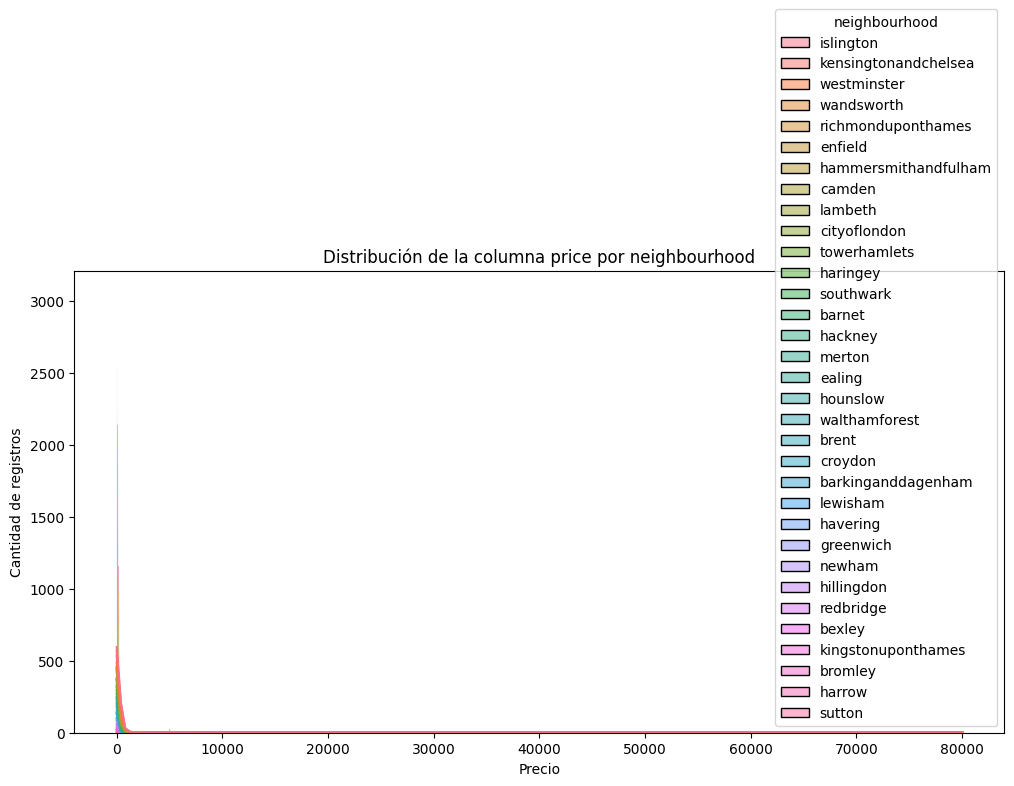

In [31]:
#para comparar el neighborhood con el segmento de precio y separar los alojamientos y representarlo mediante un grafico de isplot de la columna price
plt.figure(figsize=(12, 6))
sns.histplot(df_listings3, x='price', hue='neighbourhood', multiple='stack', kde=True)  
plt.title('Distribución de la columna price por neighbourhood') 
plt.xlabel('Precio')
plt.ylabel('Cantidad de registros')
plt.show()




In [32]:
#parta segmentar la columna price segun las tarifas por noche en valor monetario, identificando las tarifas por noche en 0-300, 300-500, 500-1000 y mayores de 1000 del dataframe df_listings3  
df_listings3['price_segment'] = pd.cut(df_listings3['price'], bins=[0, 300, 500, 1000, 10000], labels=['0-300', '300-500', '500-1000', '1000+'])
df_listings3['price_segment'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment del dataframe df_listings3  
df_listings3['price_segment'].head() #para visualizar las primeras 5 filas de la columna price_segment del dataframe df_listings3   




0      0-300
1      0-300
2    300-500
3      0-300
4      0-300
Name: price_segment, dtype: category
Categories (4, object): ['0-300' < '300-500' < '500-1000' < '1000+']

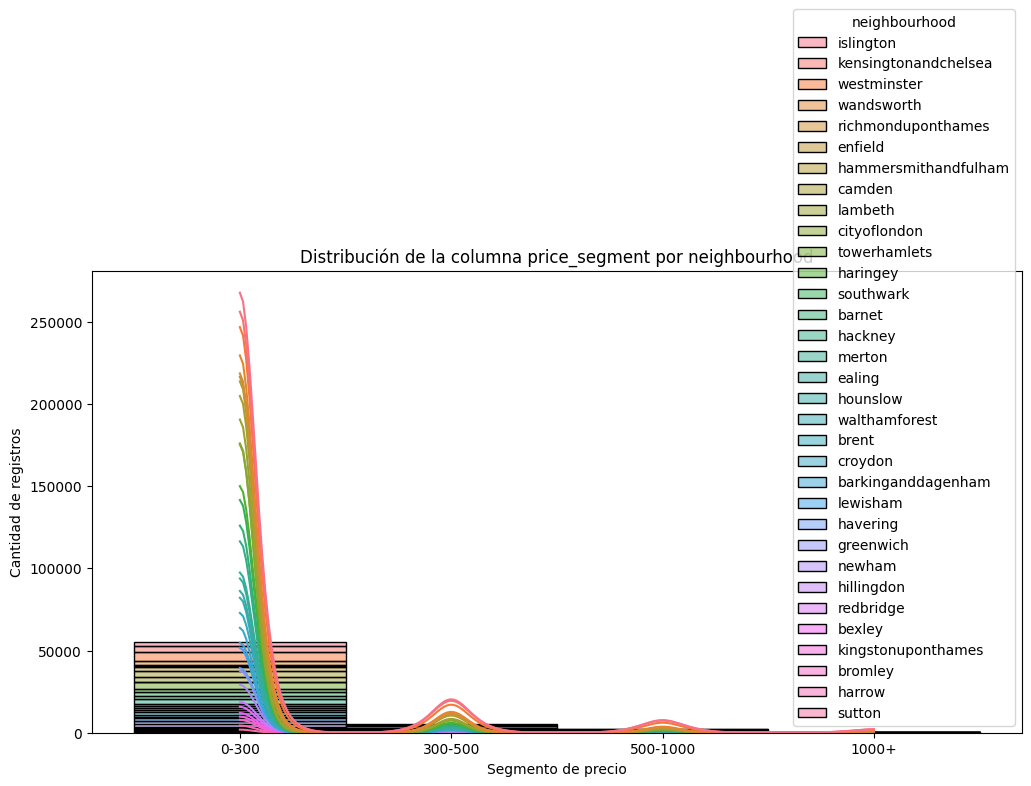

In [33]:
#mostrar mediante hisplot la distribucion de la columna price_segment del dataframe df_listings3 segun el neighborhood
plt.figure(figsize=(12, 6)) 
sns.histplot(df_listings3, x='price_segment', hue='neighbourhood', multiple='stack', kde=True)
plt.title('Distribución de la columna price_segment por neighbourhood')
plt.xlabel('Segmento de precio')
plt.ylabel('Cantidad de registros')
plt.show()

In [34]:
print(df_listings3.columns) #para visualizar las columnas que estan contenidas en el dataframe df_listings3 
print(df_listings3.shape) #para visualizar la cantidad de filas y columnas que tiene el dataframe df_listings3  



Index(['id', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'license', 'instant_bookable', 'price_segment',
       'neighbourhood'],
      dtype='object')
(96182, 17)


In [35]:
#exportar el dataframe df_listings3 a un archivo csv    
df_listings3.to_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\listings3.csv', index=False)


In [36]:
#para comparar la columna price del dataframe df_listings3 con la columna price del dataframe df_calendars 
df_calendars.head() #para visualizar las primeras 5 filas del dataframe df_calendars      

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,116268,2024-09-06,f,$40.00,NaN,7.0,730.0
1,116268,2024-09-07,f,$40.00,NaN,7.0,730.0
2,116268,2024-09-08,f,$40.00,NaN,7.0,730.0
3,116268,2024-09-09,f,$40.00,NaN,7.0,730.0
4,116268,2024-09-10,f,$40.00,NaN,7.0,730.0


<Axes: >

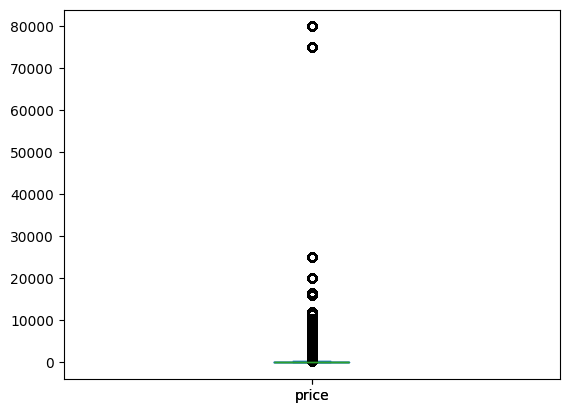

In [37]:
df_calendars['price'] = df_calendars['price'].str.replace('$','') #para reemplazar el signo $ de la columna price del dataframe df_calendars    
df_calendars['price'] = df_calendars['price'].str.replace(',','')   
df_calendars['price'] = df_calendars['price'].astype(float) #para convertir la columna price a tipo numerico    
df_calendars['price'].head() #para visualizar las primeras 5 filas de la columna price del dataframe df_calendars   
df_calendars['price'].describe() #para obtener un resumen de la columna price del dataframe df_calendars
df_calendars['price'].plot(kind='box') #para visualizar los outliers de la columna price del dataframe df_calendars
df_calendars['price'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price del dataframe df_calendars
df_calendars['price'].fillna(df_calendars['price'].mean(), inplace=True) #para reemplazar los valores nulos por la media de la columna price del dataframe df_calendars
df_calendars['price'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price del dataframe df_calendars  
df_calendars['price'].describe() #para obtener un resumen de la columna price del dataframe df_calendars
df_calendars['price'].plot(kind='box') #para visualizar los outliers de la columna price del dataframe df_calendars     

In [38]:
df_calendars['price_segment'] = pd.cut(df_calendars['price'], bins=[0, 300, 500, 1000, 10000], labels=['0-300', '300-500', '500-1000', '1000+'])    
df_calendars['price_segment'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment del dataframe df_calendars
df_calendars['price_segment'].head() #para visualizar las primeras 5 filas de la columna price_segment del dataframe df_calendars
df_calendars['price_segment'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price_segment del dataframe df_calendars  
df_calendars['price_segment'].fillna('0-300', inplace=True) #para reemplazar los valores nulos por '0-300' en la columna price_segment del dataframe df_calendars   
df_calendars['price_segment'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price_segment del dataframe df_calendars  
df_calendars['price_segment'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment del dataframe df_calendars  
df_calendars['price_segment'].head() #para visualizar las primeras 5 filas de la columna price_segment del dataframe df_calendars   

C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\172725120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_calendars['price_segment'].fillna('0-300', inplace=True) #para reemplazar los valores nulos por '0-300' en la columna price_segment del dataframe df_calendars


0    0-300
1    0-300
2    0-300
3    0-300
4    0-300
Name: price_segment, dtype: category
Categories (4, object): ['0-300' < '300-500' < '500-1000' < '1000+']

In [39]:
#compwramos la columna price_segment del dataframe df_calendars con la columna price_segment del dataframe df_listings3 
df_calendars['price_segment'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment del dataframe df_calendars  
df_listings3['price_segment'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment del dataframe df_listings3
df_calendars['price_segment'].isin(df_listings3['price_segment']).value_counts() #para saber si los valores de la columna price_segment del dataframe df_calendars estan en la columna price_segment del dataframe df_listings3
df_listings3['price_segment'].isin(df_calendars['price_segment']).value_counts() #para saber si los valores de la columna price_segment del dataframe df_listings3 estan en la columna price_segment del dataframe df_calendars


price_segment
True     63191
False    32991
Name: count, dtype: int64

In [40]:
#paea verificar los valores unicos de la columna price_segment del dataframe df_calendars
df_calendars['price_segment'].unique() #para saber los valores unicos de la columna price_segment del dataframe df_calendars    
df_listings3['price_segment'].unique() #para saber los valores unicos de la columna price_segment del dataframe df_listings3    
    

['0-300', '300-500', NaN, '1000+', '500-1000']
Categories (4, object): ['0-300' < '300-500' < '500-1000' < '1000+']

In [41]:
#paravwricar kias valores nulos existen en el dataframe df_calendars en porcentaje
df_calendars.isnull().mean() * 100  #para saber el porcentaje de valores nulos en cada columna del dataframe df_calendars



listing_id         0.000000
date               0.000000
available          0.000000
price              0.000000
adjusted_price    99.981285
minimum_nights     0.001023
maximum_nights     0.001023
price_segment      0.000000
dtype: float64

In [42]:
#para señeccionar del data frame df_calendars las columnas que se van a utilizar
df_calendars2 = df_calendars[['listing_id','date','price','price_segment','available']]
df_calendars2.head() #para visualizar las primeras 5 filas del dataframe df_calendars2
df_calendars2.isnull().mean() * 100  #para saber el porcentaje de valores nulos en cada columna del dataframe df_calendars2


listing_id       0.0
date             0.0
price            0.0
price_segment    0.0
available        0.0
dtype: float64

In [43]:
df_calendars2['date'] = pd.to_datetime(df_calendars2['date']) #para convertir la columna date a tipo fecha
df_calendars2['date'].head() #para visualizar las primeras 5 filas de la columna date del dataframe df_calendars2


C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\1501062878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendars2['date'] = pd.to_datetime(df_calendars2['date']) #para convertir la columna date a tipo fecha


0   2024-09-06
1   2024-09-07
2   2024-09-08
3   2024-09-09
4   2024-09-10
Name: date, dtype: datetime64[ns]

In [44]:
#para exportar el dataframe df_calendars2 a un archivo csv
df_calendars2.to_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\calendars2.csv', index=False)



In [45]:
#para verificar los valores nulos que existen en la columna price del df_listings3
df_listings3['price'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price del dataframe df_listings3

#para realizar una limpieza de los valores nulos de la columna price del dataframe df_listings3 segun el segmento de precio de la columna price_segment
df_listings3['price'].fillna(df_listings3.groupby('price_segment')['price'].transform('mean'), inplace=True) #para reemplazar los valores nulos por la media de la columna price segun el segmento de precio de la columna price_segment
df_listings3['price'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price del dataframe df_listings3
df_listings3['price'].describe() #para obtener un resumen de la columna price del dataframe df_listings3


C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\621113694.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_listings3['price'].fillna(df_listings3.groupby('price_segment')['price'].transform('mean'), inplace=True) #para reemplazar los valores nulos por la media de la columna price segun el segmento de precio de la columna price_segment
C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\621113694.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inp

count    63205.000000
mean       197.150225
std        839.625190
min          1.000000
25%         76.000000
50%        130.000000
75%        211.000000
max      80000.000000
Name: price, dtype: float64

In [46]:
#para verificar los valores nulos que existen en la columna price del df_listings3
df_listings3['price'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price del dataframe df_listings3


np.float64(34.286041047181385)

In [47]:
#para completar los valores nulos de la comuna price del dataframe df_listings3 con la media de la columna price_segment para los segmentos de precio 0-300, 300-500, 500-1000 
df_listings3['price'].fillna(df_listings3.groupby('price_segment')['price'].transform('mean'), inplace=True) #para reemplazar los valores nulos por la media de la columna price segun el segmento de precio de la columna price_segment 
df_listings3['price'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price del dataframe df_listings3
df_listings3['price'].describe() #para obtener un resumen de la columna price del dataframe df_listings3


C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\2738608460.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_listings3['price'].fillna(df_listings3.groupby('price_segment')['price'].transform('mean'), inplace=True) #para reemplazar los valores nulos por la media de la columna price segun el segmento de precio de la columna price_segment
C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\2738608460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, i

count    63205.000000
mean       197.150225
std        839.625190
min          1.000000
25%         76.000000
50%        130.000000
75%        211.000000
max      80000.000000
Name: price, dtype: float64

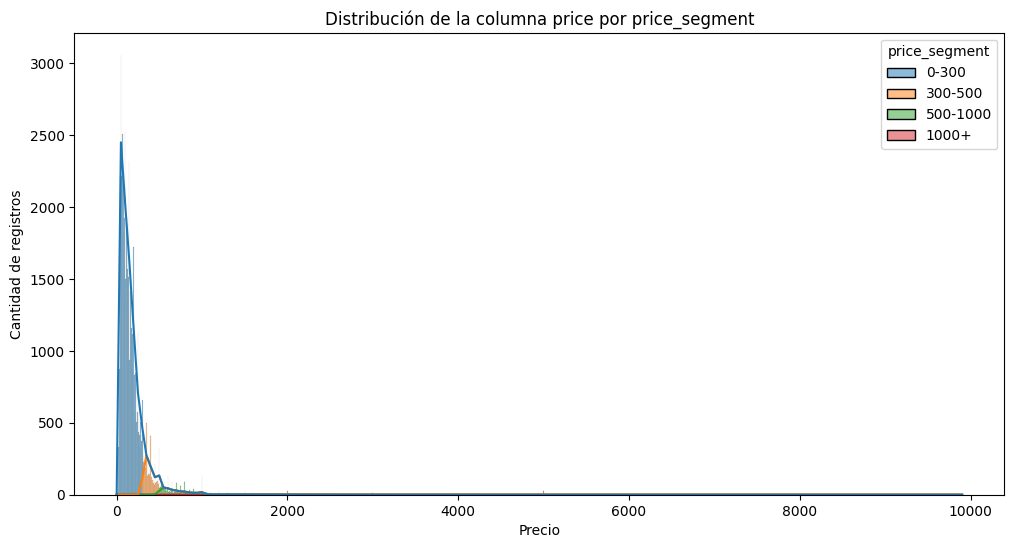

In [48]:
#para representar mediante un hisplot la distribucion de la columna price del dataframe df_listings3 segun el segmento de precio de la columna price_segment
plt.figure(figsize=(12, 6))
sns.histplot(df_listings3, x='price', hue='price_segment', multiple='stack', kde=True)
plt.title('Distribución de la columna price por price_segment')
plt.xlabel('Precio')
plt.ylabel('Cantidad de registros')
plt.show()


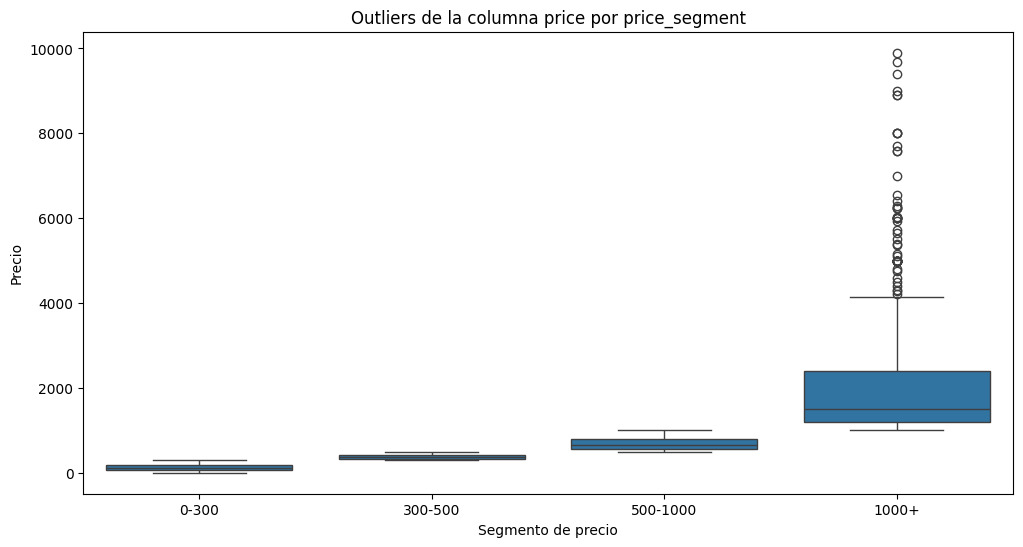

In [49]:
#para representar los outliners de la columna price del dataframe df_listings3 segun la columna price_segment mediante un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_listings3, x='price_segment', y='price')
plt.title('Outliers de la columna price por price_segment')
plt.xlabel('Segmento de precio')
plt.ylabel('Precio')
plt.show()


In [50]:
#para verificar los valores nulos que existen en la columna price del df_listings3 separado por segmento de precio  
# 0-300  
# 300-500
# 500-1000
# 1000+
print(df_listings3[df_listings3['price_segment'] == '0-300']['price'].isnull().mean() * 100) 
print(df_listings3[df_listings3['price_segment'] == '300-500']['price'].isnull().mean() * 100)  
print(df_listings3[df_listings3['price_segment'] == '500-1000']['price'].isnull().mean() * 100)  
print(df_listings3[df_listings3['price_segment'] == '1000+']['price'].isnull().mean() * 100)  


0.0
0.0
0.0
0.0


In [51]:
#para verificar los valores nulos que existen en la columna price del df_listings3 separado por segmento de precio
df_listings3.isnull().mean() * 100  #para saber el porcentaje de valores nulos en cada columna del dataframe df_listings3
df_listings3['price'].describe() #para obtener un resumen de la columna price del dataframe df_listings3

count    63205.000000
mean       197.150225
std        839.625190
min          1.000000
25%         76.000000
50%        130.000000
75%        211.000000
max      80000.000000
Name: price, dtype: float64

In [52]:
df_listings4=df_listings3.dropna(subset=['price']) #para eliminar los valores nulos de la columna price del dataframe df_listings3
df_listings4.isnull().mean() * 100  #para saber el porcentaje de valores nulos en cada columna del dataframe df_listings4
df_listings4['price'].describe() #para obtener un resumen de la columna price del dataframe df_listings4

count    63205.000000
mean       197.150225
std        839.625190
min          1.000000
25%         76.000000
50%        130.000000
75%        211.000000
max      80000.000000
Name: price, dtype: float64

In [53]:
#para exportar el dataframe df_listings4 a un archivo csv
df_listings4.to_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\listings4.csv', index=False)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

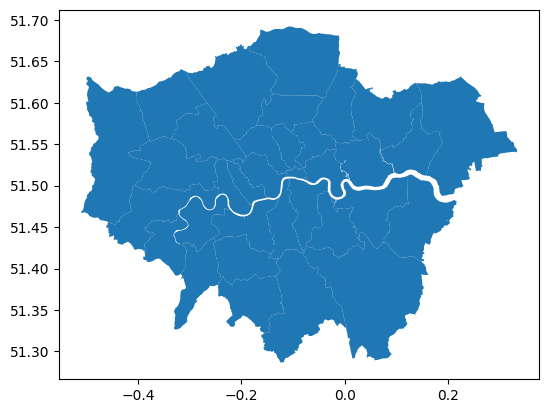

In [54]:
%pip install geopandas

import geopandas as gpd

# para visualizar el archivo E:\Bootcamp\Proyecto Modulo 2 Airbnb\neighbourhoods.geojson
file_path = r'E:\Bootcamp\Proyecto Modulo 2 Airbnb\neighbourhoods.geojson'
gdf = gpd.read_file(file_path)
gdf.plot()

In [55]:
#para verificar las columnas que estan contenidas en el dataframe neighbourhoods.geojson
gdf.columns
gdf.head()


,neighbourhood,neighbourhood_group,geometry
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51..."
1,Croydon,None,"MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51..."
2,Bromley,None,"MULTIPOLYGON (((0.01216 51.2996, 0.01199 51.29..."
3,Hounslow,None,"MULTIPOLYGON (((-0.24454 51.4887, -0.24466 51...."
4,Ealing,None,"MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51..."


In [56]:
#para verificar los valores nulos o vaciones de las columnas del dataframe gdf
gdf.isnull().mean() * 100  #para saber el porcentaje de valores nulos en cada columna del dataframe gdf



neighbourhood            0.0
neighbourhood_group    100.0
geometry                 0.0
dtype: float64

In [57]:
#para eliminar la columna neighbourhood_group del dataframe gdf
gdf = gdf.drop('neighbourhood_group', axis=1)
gdf.columns #para visualizar las columnas que estan contenidas en el dataframe gdf
gdf.head() #para visualizar las primeras 5 filas del dataframe gdf



,neighbourhood,geometry
0,Kingston upon Thames,"MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51..."
1,Croydon,"MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51..."
2,Bromley,"MULTIPOLYGON (((0.01216 51.2996, 0.01199 51.29..."
3,Hounslow,"MULTIPOLYGON (((-0.24454 51.4887, -0.24466 51...."
4,Ealing,"MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51..."


In [58]:
#para exportar el dataframe gdf a un archivo geojson que se va a llamar neighbourhoods2.geojson para poder visualizarlo en power bi
gdf.to_file(r'E:\Bootcamp\Proyecto Modulo 2 Airbnb\neighbourhoods2.geojson', driver='GeoJSON')


In [59]:
# Cargar el archivo GeoJSON
gdf = gpd.read_file('E:\Bootcamp\Proyecto Modulo 2 Airbnb/neighbourhoods2.geojson')

# Exportar a CSV
gdf.to_csv('neighbourhoods2.csv', index=False)



In [60]:
#comparar la columna neighbourhood del dataframe gdf con la columna neighbourhood_cleansed del dataframe df_listings4   
gdf['neighbourhood'].value_counts() #para saber la cantidad de valores que tiene la columna neighbourhood del dataframe gdf
df_listings4['neighbourhood_cleansed'].value_counts() #para saber la cantidad de valores que tiene la columna neighbourhood_cleansed del dataframe df_listings4
gdf['neighbourhood'].isin(df_listings4['neighbourhood_cleansed']).value_counts() #para saber si los valores de la columna neighbourhood del dataframe gdf estan en la columna neighbourhood_cleansed del dataframe df_listings4
df_listings4['neighbourhood_cleansed'].isin(gdf['neighbourhood']).value_counts() #para saber si los valores de la columna neighbourhood_cleansed del dataframe df_listings4 estan en la columna neighbourhood del dataframe gdf


neighbourhood_cleansed
False    63205
Name: count, dtype: int64

In [61]:
#para verificar los valores unicos de la columna neighbourhood del dataframe gdf
gdf['neighbourhood'].unique() #para saber los valores unicos de la columna neighbourhood del dataframe gd

#para determinar la cantidade de filas y columnas que tiene el dataframe gdf
#las Filas corresponde a Distritos y las columnas a las localizacion latitud y longitud del distrito 
print("gdf contiene:" + str(gdf.shape))



gdf contiene:(33, 2)


In [62]:
#para verificar los valores unicos de la columna neighbourhood del dataframe df_listings4
df_listings4['neighbourhood_cleansed'].unique() #para saber los valores unicos de la columna neighbourhood_cleansed del dataframe df_listings4 

#para determinar la cantidad de valores unicos que tiene la columna neighbourhood_cleansed del dataframe df_listings4
print("df_listings4 contiene:" + str(df_listings4['neighbourhood_cleansed'].nunique()))



df_listings4 contiene:33


In [63]:
#para verificar los valores unicos de la columna neighbourhood del dataframe df_listings4
df_listings4['neighbourhood'].unique() 

#para determinar la cantidad de valores unicos que tiene la  del dataframe df_listings4
print("df_listings4 contiene:" + str(df_listings4['neighbourhood'].nunique()))  


df_listings4 contiene:33


In [64]:
#para comparar la columna neighbourhood del dataframe gdf con la columna neighbourhood_cleansed del dataframe df_listings4   
gdf['neighbourhood'].value_counts() #para saber la cantidad de valores que tiene la columna neighbourhood del dataframe gdf
df_listings4['neighbourhood_cleansed'].value_counts() #para saber la cantidad de valores que tiene la columna neighbourhood_cleansed del dataframe df_listings4
gdf['neighbourhood'].isin(df_listings4['neighbourhood_cleansed']).value_counts() #para saber si los valores de la columna neighbourhood del dataframe gdf estan en la columna neighbourhood_cleansed del dataframe df_listings4
df_listings4['neighbourhood_cleansed'].isin(gdf['neighbourhood']).value_counts() #para saber si los valores de la columna neighbourhood_cleansed del dataframe df_listings4 estan en la columna neighbourhood del dataframe gdf


neighbourhood_cleansed
False    63205
Name: count, dtype: int64

In [65]:
#verificar los valores unicos de las columas latitud y longitud del df_listings4 
df_listings4['latitude'].unique() #para saber los valores unicos de la columna latitude del dataframe df_listings4
df_listings4['longitude'].unique() #para saber los valores unicos de la columna longitude del dataframe df_listings4



array([-0.1127    , -0.16813   , -0.14094   , ..., -0.20352961,
       -0.30765757, -0.00395   ])

In [66]:
#pPARA VERIFICAR LOS VALORES NULOS PRESENTES EN LAS COLUMNAS LATITUD Y LONGITUD DEL DATAFRAME DF_LISTINGS4  
df_listings4['latitude'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna latitude del dataframe df_listings4
df_listings4['longitude'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna longitude del dataframe df_listings4

np.float64(0.0)

In [67]:
#para exportar un archivo csv  los valores unicos de las columnas latitude y longitude del dataframe df_listings4 
df_listings4['latitude'].unique() #para saber los valores unicos de la columna latitude del dataframe df_listings4
df_listings4['longitude'].unique() #para saber los valores unicos de la columna longitude del dataframe df_listings4
df_listings4[['latitude','longitude']].to_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\listings_lat_lon.csv', index=False) #para exportar un archivo csv con las columnas latitude y longitude del dataframe df_listings4






In [68]:
#%pip install geojson

import geojson

# Crear una lista de características (features) GeoJSON
features = []
for _, row in df_listings4.iterrows():
    point = geojson.Point((row["longitude"], row["latitude"]))  # GeoJSON usa (long, lat)
    feature = geojson.Feature(geometry=point, properties={"id": row["id"]})
    features.append(feature)

# Crear la colección de características (FeatureCollection)
feature_collection = geojson.FeatureCollection(features)

# Guardar como archivo GeoJSON
output_path = "listings5geojson.geojson"
with open(output_path, "w") as geojson_file:
    geojson.dump(feature_collection, geojson_file, indent=2)

print(f"Archivo GeoJSON creado en {output_path}")


Archivo GeoJSON creado en listings5geojson.geojson


<Axes: >

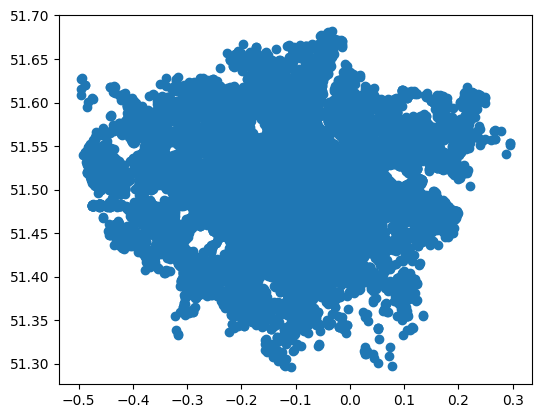

In [69]:
#para revisar el Archivo GeoJSON creado 
gdf = gpd.read_file('listings5geojson.geojson')
gdf.plot()




In [70]:
#PARA VISUALIZAR EL ARCHIVO GEOJSON CREADO EN POWER BI
# Exportar a CSV
gdf.to_csv('listings5geojson.csv', index=False)


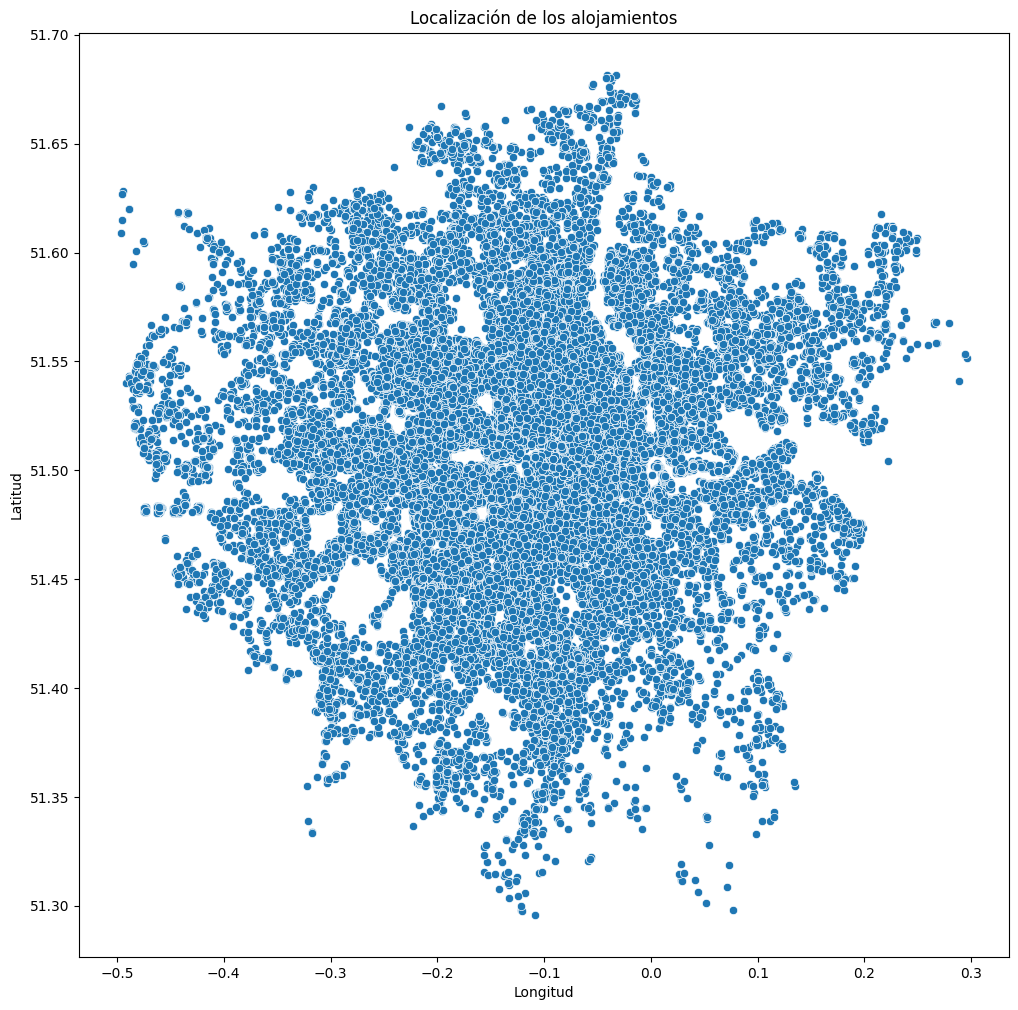

In [71]:
#para visaulizar el archivo listings5geojson.GeoJSON en un grafico seaborn con localizacion de los alojamientos 
plt.figure(figsize=(12, 12))
sns.scatterplot(data=df_listings4, x='longitude', y='latitude')
plt.title('Localización de los alojamientos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [72]:
#para crear una copia dela columna price del dataframe df_listings4
df_listings4['price_copy'] = df_listings4['price'] #para crear una copia de la columna price del dataframe df_listings4 
df_listings4['price_copy'].head() #para visualizar las primeras 5 filas de la columna price_copy del dataframe df_listings4

#PARA VERIFICAR LOS VALORES NULOS PRESENTES EN LA COLUMNA PRICE_COPY DEL DATAFRAME DF_LISTINGS4
df_listings4['price_copy'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price_copy del dataframe df_listings4


C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\3073022602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings4['price_copy'] = df_listings4['price'] #para crear una copia de la columna price del dataframe df_listings4


np.float64(0.0)

In [73]:
#para segmentar la columna price_copy segun las tarifas por noche en valor monetario, identificando las tarifas por noche en 0-300, 300-500, 500-1000 y mayores de 1000 del dataframe df_listings4
df_listings4['price_segment2'] = pd.cut(df_listings4['price_copy'], bins=[0, 300, 500, 1000, 10000], labels=['0-300', '300-500', '500-1000', '1000+'])
df_listings4['price_segment2'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment2 del dataframe df_listings4
df_listings4['price_segment2'].head() #para visualizar las primeras 5 filas de la columna price_segment2 del dataframe df_listings4

C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\4169611457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings4['price_segment2'] = pd.cut(df_listings4['price_copy'], bins=[0, 300, 500, 1000, 10000], labels=['0-300', '300-500', '500-1000', '1000+'])


0      0-300
1      0-300
2    300-500
3      0-300
4      0-300
Name: price_segment2, dtype: category
Categories (4, object): ['0-300' < '300-500' < '500-1000' < '1000+']

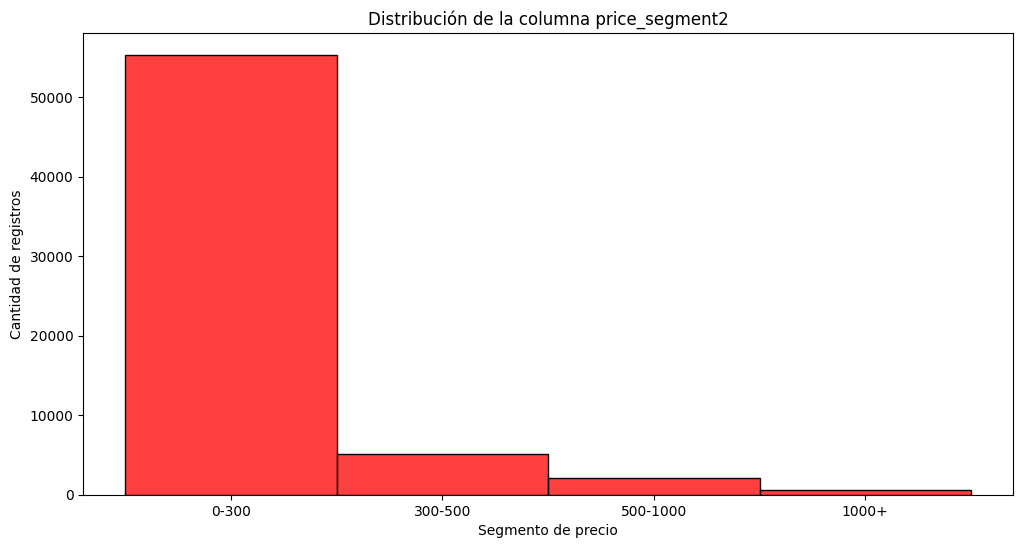

In [74]:
#para verificar los valores nulos que existen en la columna price_segment2 del df_listings4
df_listings4['price_segment2'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price_segment2 del dataframe df_listings4

#para verificar mediante un hisplot la distribucion de la columna price_segment2 del dataframe df_listings4
plt.figure(figsize=(12, 6))
sns.histplot(df_listings4['price_segment2'], kde=False, color='red')
plt.title('Distribución de la columna price_segment2')
plt.xlabel('Segmento de precio')
plt.ylabel('Cantidad de registros')
plt.show()


In [75]:
#para corregir los valores nulos de la columna price_segment2 del dataframe df_listings4 segun el segmento de precio de la columna price_segment2
df_listings4['price_segment2'].fillna('0-300', inplace=True) #para reemplazar los valores nulos por '0-300' en la columna price_segment2 del dataframe df_listings4   
df_listings4['price_segment2'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price_segment2 del dataframe df_listings4    
df_listings4['price_segment2'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment2 del dataframe df_listings4

C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\621434119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings4['price_segment2'].fillna('0-300', inplace=True) #para reemplazar los valores nulos por '0-300' en la columna price_segment2 del dataframe df_listings4
C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\621434119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

price_segment2
0-300       55353
300-500      5151
500-1000     2111
1000+         590
Name: count, dtype: int64

In [76]:
#para corregir los valores nulos de la columna price_segment2 del dataframe df_listings4 segun el segmento de precio de la columna price_segment2

df_listings4['price_segment2'].fillna('0-300', inplace=True) #para reemplazar los valores nulos por '0-300' en la columna price_segment2 del dataframe df_listings4
df_listings4['price_segment2'].fillna('300-500', inplace=True) #para reemplazar los valores nulos por '300-500' en la columna price_segment2 del dataframe df_listings4   #para corregir los valores nulos de la columna price_segment2 del dataframe df_listings4 segun el segmento de precio de la columna price_segment2
df_listings4['price_segment2'].fillna('500-1000', inplace=True) #para reemplazar los valores nulos por '500-1000' en la columna price_segment2 del dataframe df_listings4
df_listings4['price_segment2'].fillna('1000+', inplace=True) #para reemplazar los valores nulos por '1000+' en la columna price_segment2 del dataframe df_listings4

df_listings4['price_segment2'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price_segment2 del dataframe df_listings4
df_listings4['price_segment2'].value_counts() #para saber la cantidad de valores que tiene cada segmento de la columna price_segment2 del dataframe df_listings4



C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\2019785174.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings4['price_segment2'].fillna('0-300', inplace=True) #para reemplazar los valores nulos por '0-300' en la columna price_segment2 del dataframe df_listings4
C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\2019785174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

price_segment2
0-300       55353
300-500      5151
500-1000     2111
1000+         590
Name: count, dtype: int64

C:\Users\dysmi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


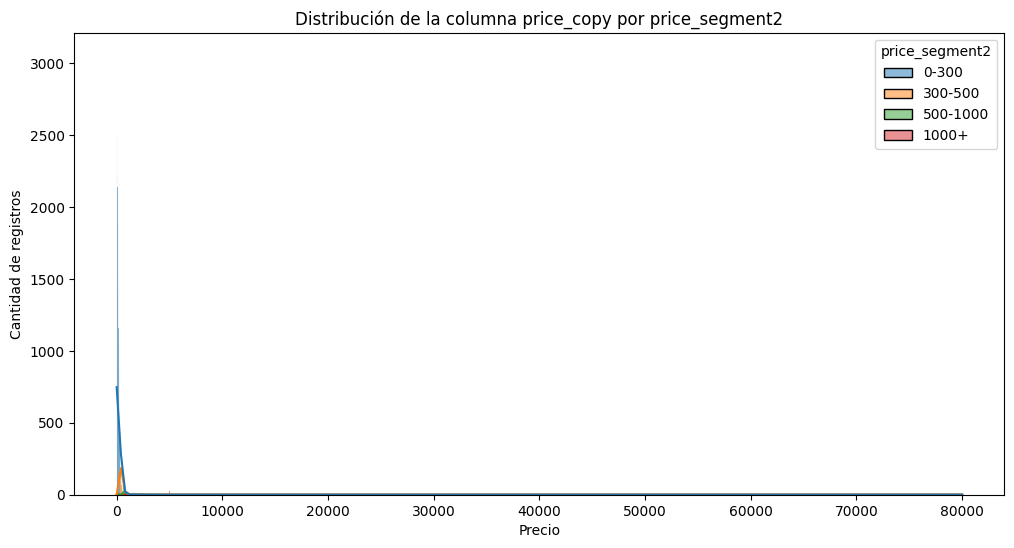

In [77]:
#para mostratr mediante un grafico de hisplot la distribucion de la columna price_segment2 del dataframe df_listings4 y los outlines de la columna price_copy en cada segmento de precio
plt.figure(figsize=(12, 6))
sns.histplot(df_listings4, x='price_copy', hue='price_segment2', multiple='stack', kde=True)
plt.title('Distribución de la columna price_copy por price_segment2')
plt.xlabel('Precio')
plt.ylabel('Cantidad de registros')
plt.show()



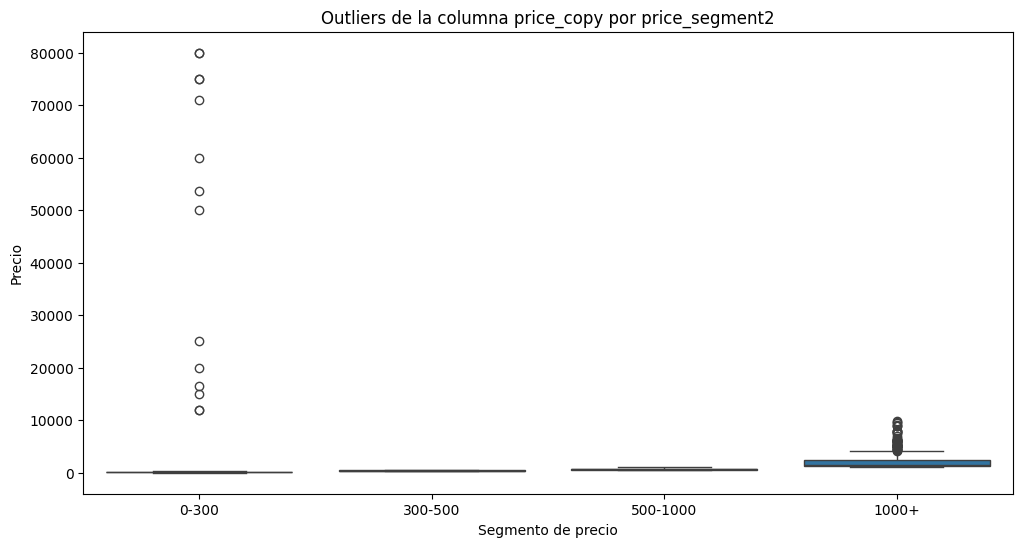

In [78]:
#para mostrar mediante un boxplot los outliers de la columna price_copy del dataframe df_listings4 para cada segmento de precio de la columna price_segment2 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_listings4, x='price_segment2', y='price_copy')
plt.title('Outliers de la columna price_copy por price_segment2')
plt.xlabel('Segmento de precio')
plt.ylabel('Precio')
plt.show()


In [79]:
# Filtrar los registros del segmento 0-300
segment_0_300 = df_listings4[df_listings4['price_segment2'] == '0-300']

# Verificar si hay precios superiores a 10000 en el segmento 0-300
outliers = segment_0_300[segment_0_300['price_copy'] > 10000]

# Mostrar los registros con precios superiores a 10000 en el segmento 0-300
print(outliers)

                        id    host_id host_is_superhost  \
7559               9721759   50179961                 f   
10309             13254774   34349317                 f   
34954             41557986  144786680                 f   
35704             42435181  144786680                 f   
35793             42596787    9856732                 f   
41187             52112740    3797580                 f   
64613   943540074261545116  488109444                 f   
72858  1040471243366946776  444163551                 f   
75160  1069626776402758037  444163551                 f   
84375  1157104024326218154  489477288                 f   
87934  1183168933886992107  144786680                 f   
89837  1196233560198207804    5541741                 f   
91161  1204543804094089153  144786680                 f   
91662  1207889725595849665  288496523                 f   

      host_identity_verified neighbourhood_cleansed   latitude  longitude  \
7559                       t         

In [80]:
# Corregir los outliers del segmento 0-300 cuyo precio por noche supera el límite del segmento valor monetario 300
df_listings4.loc[(df_listings4['price_segment2'] == '0-300') & (df_listings4['price_copy'] > 300), 'price_segment2'] = '1000+'

# Verificar los cambios
df_listings4['price_segment2'].value_counts()

price_segment2
0-300       55339
300-500      5151
500-1000     2111
1000+         604
Name: count, dtype: int64

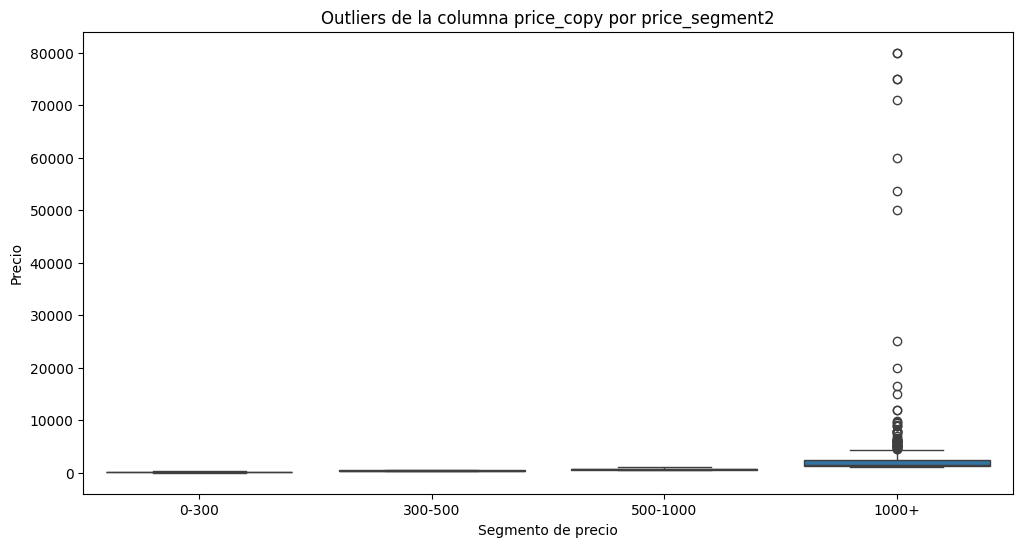

In [82]:
#para verificar mediante un boxplot la distribucion de la columna price_segment2 del dataframe df_listings4 segun los segmentos de precio y mostrar los aoutliners de la columna price_copy
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_listings4, x='price_segment2', y='price_copy')
plt.title('Outliers de la columna price_copy por price_segment2')
plt.xlabel('Segmento de precio')
plt.ylabel('Precio')
plt.show()



In [85]:
#para determinar cuantos valores de la columna price_copy del dataframe df_listings4 existen en el segmento de precio 1000+
df_listings4[df_listings4['price_segment2'] == '1000+']['price_copy'].count() #para saber la cantidad de valores que tiene la columna price_copy del dataframe df_listings4 en el segmento de precio 1000+




np.int64(604)

In [90]:
#para determinar cuantos valores de la columna price_copy del dataframe df_listings4 estan por encima de 10000 en el segmento de precio 1000+
df_listings4[(df_listings4['price_segment2'] == '1000+') & (df_listings4['price_copy'] > 10000)]['price_copy'].count() #para saber la cantidad de valores que tiene la columna price_copy del dataframe df_listings4 en el segmento de precio 1000+ que estan por encima de 10000   


df_listings4[(df_listings4['price_segment2'] == '1000+') & (df_listings4['price_copy'] > 10000)].sort_values('price_copy', ascending=False) #para saber la cantidad de valores que tiene la columna price_copy del dataframe df_listings4 en el segmento de precio 1000+ que estan por encima de 10000



,id,host_id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,license,instant_bookable,price_segment,neighbourhood,price_copy,price_segment2
75160,1069626776402758037,444163551,f,t,southwark,51.499454,-0.092094,Private room in rental unit,Private room,3,80000.0,2,365,False,t,NaN,southwark,80000.0,1000+
72858,1040471243366946776,444163551,f,t,lambeth,51.490180,-0.104840,Private room in rental unit,Private room,3,80000.0,2,365,False,t,NaN,lambeth,80000.0,1000+
35704,42435181,144786680,f,t,lambeth,51.493790,-0.113330,Private room in rental unit,Private room,3,75000.0,2,1125,False,f,NaN,lambeth,75000.0,1000+
34954,41557986,144786680,f,t,lambeth,51.493070,-0.113880,Private room in rental unit,Private room,3,75000.0,2,1125,False,t,NaN,lambeth,75000.0,1000+
87934,1183168933886992107,144786680,f,t,lambeth,51.496497,-0.113362,Private room in rental unit,Private room,3,71000.0,2,365,False,t,NaN,lambeth,71000.0,1000+
35793,42596787,9856732,f,t,southwark,51.485661,-0.096486,Entire townhouse,Entire home/apt,5,60000.0,2,365,False,f,NaN,southwark,60000.0,1000+
10309,13254774,34349317,f,t,kensingtonandchelsea,51.508610,-0.198630,Private room in rental unit,Private room,1,53588.0,3,12,False,f,NaN,kensingtonandchelsea,53588.0,1000+
91161,1204543804094089153,144786680,f,t,lambeth,51.495831,-0.112992,Private room in rental unit,Private room,2,50000.0,2,365,False,t,NaN,lambeth,50000.0,1000+
7559,9721759,50179961,f,t,camden,51.543350,-0.183880,Entire rental unit,Entire home/apt,6,25000.0,4,365,False,f,NaN,camden,25000.0,1000+
41187,52112740,3797580,f,t,kensingtonandchelsea,51.491950,-0.167840,Entire serviced apartment,Entire home/apt,2,20000.0,150,200,False,t,NaN,kensingtonandchelsea,20000.0,1000+


In [93]:
#para exportar el dataframe df_listings4 a un archivo csv eon el nombre modificado listings4_.csv
df_listings4.to_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\listings4_.csv', index=False)


In [94]:
#para comparar la columna price con la columna price copy y completar los valores faltantes
df_listings4['price'] = df_listings4['price'].fillna(df_listings4['price_copy'])
df_listings4['price'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price después de completar los valores faltantes

#para verificar los cambios en la columna price del dataframe df_listings4 comparando las columnas price y price_copy
df_listings4[['price', 'price_copy']].head() #para visualizar las primeras 5 filas de las columnas price y price_copy del dataframe df_listings4



C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\1653999143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings4['price'] = df_listings4['price'].fillna(df_listings4['price_copy'])


,price,price_copy
0,59.0,59.0
1,120.0,120.0
2,493.0,493.0
3,190.0,190.0
4,140.0,140.0


In [95]:
#para comparar la columna price_segement con la columna price_segment2 y completar los valores faltantes
df_listings4['price_segment'] = df_listings4['price_segment'].fillna(df_listings4['price_segment2'])
df_listings4['price_segment'].isnull().mean() * 100  #para saber el porcentaje de valores nulos en la columna price_segment después de completar los valores faltantes

#para verificar los cambios en la columna price_segment del dataframe df_listings4 comparando las columnas price_segment y price_segment2
df_listings4[['price_segment', 'price_segment2']].head() #para visualizar las primeras 5 filas de las columnas price_segment y price_segment2 del dataframe df_listings4


C:\Users\dysmi\AppData\Local\Temp\ipykernel_46496\599793388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings4['price_segment'] = df_listings4['price_segment'].fillna(df_listings4['price_segment2'])


,price_segment,price_segment2
0,0-300,0-300
1,0-300,0-300
2,300-500,300-500
3,0-300,0-300
4,0-300,0-300


In [96]:
#para eliminr las columnas price_copy y price_segment2 del dataframe df_listings4
df_listings4 = df_listings4.drop(['price_copy', 'price_segment2'], axis=1)
df_listings4.columns #para visualizar las columnas que estan contenidas en el dataframe df_listings4
df_listings4.head() #para visualizar las primeras 5 filas del dataframe df_listings4


,id,host_id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,license,instant_bookable,price_segment,neighbourhood
0,13913,54730,t,t,islington,51.56861,-0.11270,Private room in rental unit,Private room,1,59.0,1,29,False,f,0-300,islington
1,15400,60302,f,t,kensingtonandchelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,120.0,4,30,False,f,0-300,kensingtonandchelsea
2,17402,67564,t,t,westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,493.0,3,365,False,f,300-500,westminster
3,24328,41759,f,t,wandsworth,51.47072,-0.16266,Entire townhouse,Entire home/apt,4,190.0,2,1125,False,f,0-300,wandsworth
4,33332,144444,f,f,richmonduponthames,51.46410,-0.32498,Private room in home,Private room,2,140.0,2,21,False,f,0-300,richmonduponthames


In [97]:
#para exportar el dataframe df_listings4 a un archivo csv con el nombre modificado listings4.csv
df_listings4.to_csv('E:\Bootcamp\Proyecto Modulo 2 Airbnb\Detail_data\listings4.csv', index=False)
